<a href="https://colab.research.google.com/github/rkgupta7463/Computer-Visions-Projects/blob/main/Road_Mark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Dec  4 15:39:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **1. Installing requirs libraries and Creating the YOLOV8 Model**

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

### 2. **Colecting the datas from Kaggle with Kaggle API (Road Mark Detection)**

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d pkdarabi/road-mark-detection

 95% 153M/161M [00:02<00:00, 42.6MB/s]
100% 161M/161M [00:02<00:00, 60.4MB/s]


In [7]:
import zipfile
zip = zipfile.ZipFile("/content/road-mark-detection.zip",'r')
zip.extractall("/content/road-mark-detection")
zip.close()

### **3. Now Let's start training our YOLOv8n Model with Our custom data**

In [8]:
model.train(data="road-mark-detection/data.yaml", epochs=25)  # train the model

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=road-mark-detection/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

### **4. Now Let's Our YOLOv8n Model**

In [9]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/road-mark-detection/valid/labels.cache... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]
                   all        417       1966      0.835      0.769      0.828       0.61
              BUS LANE        417         32      0.936      0.916       0.94      0.675
      Jeltaya razmetka        417         29      0.945      0.897       0.92       0.65
              Liniya 1        417       1212      0.837      0.612      0.771      0.564
              Liniya 2        417         59      0.768      0.305      0.441      0.209
               Perehod        417        132      0.896      0.826      0.918      0.646
                 

### **4. Now Let's look once confusion metrics and other metrics as well**

In [10]:
from PIL import Image

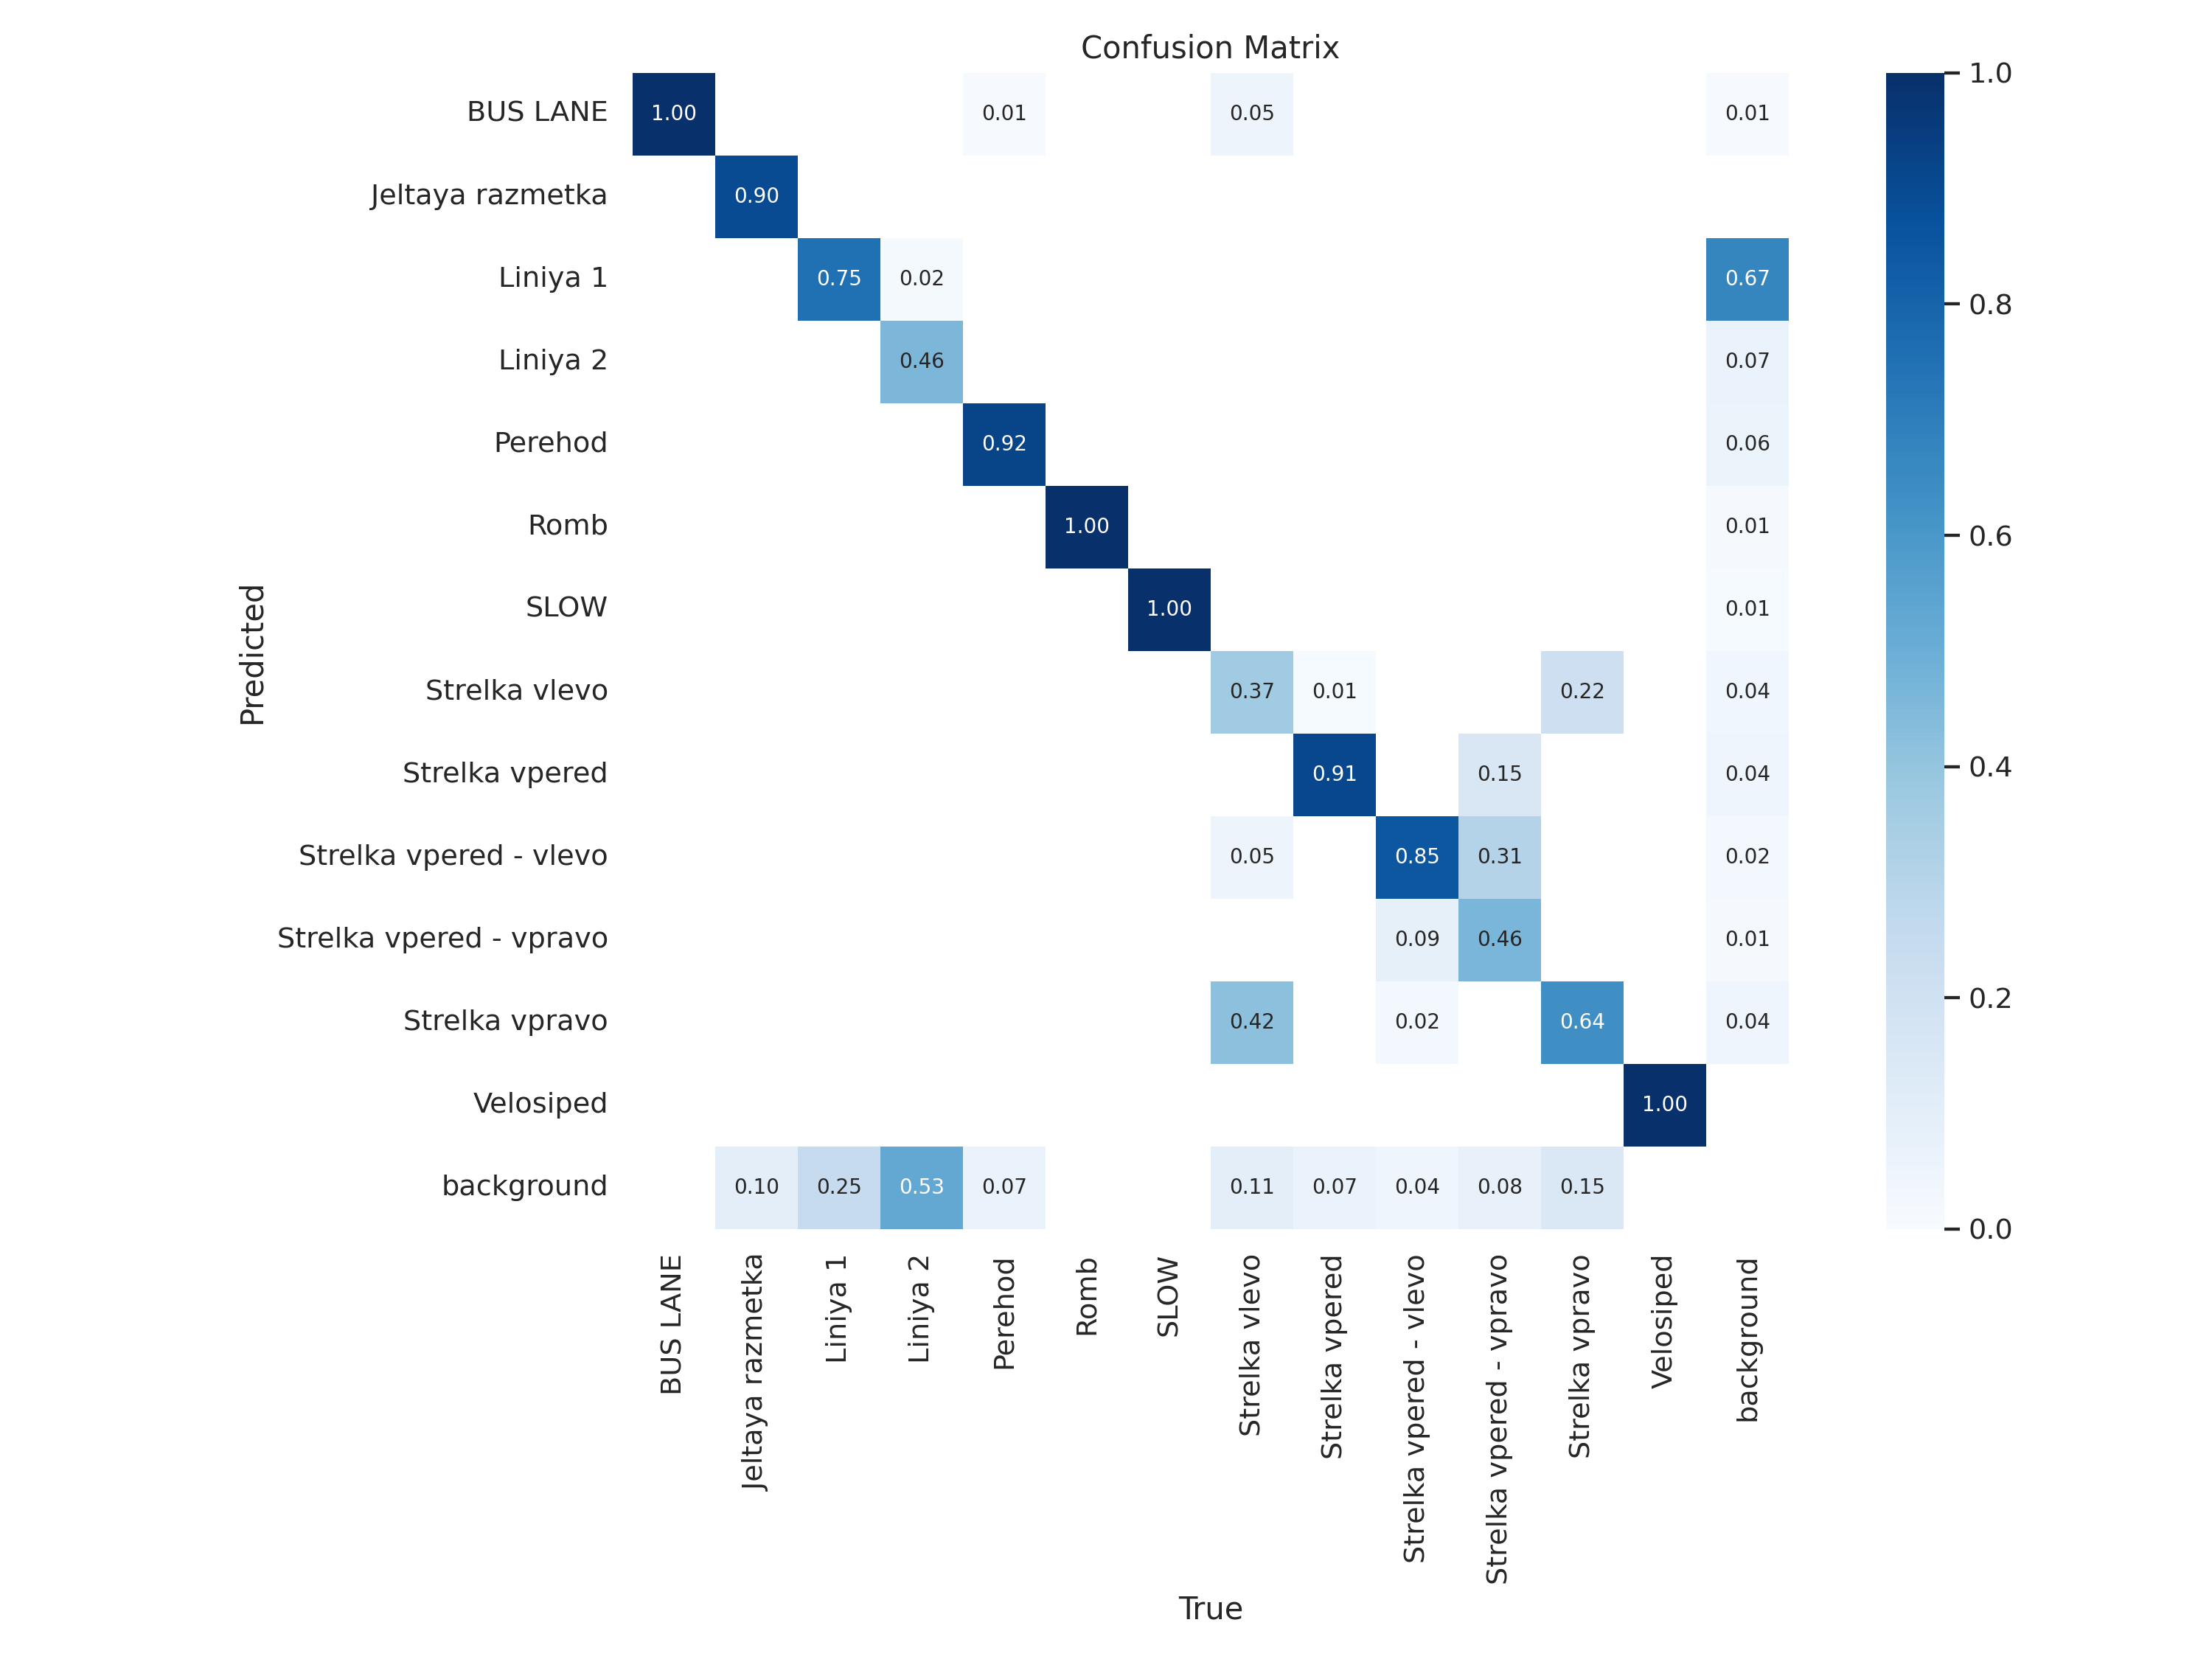

In [11]:
Image.open("/content/runs/detect/train/confusion_matrix.png")

### **5. Now Let's Predict with unseen images or data and looking how it accurate**

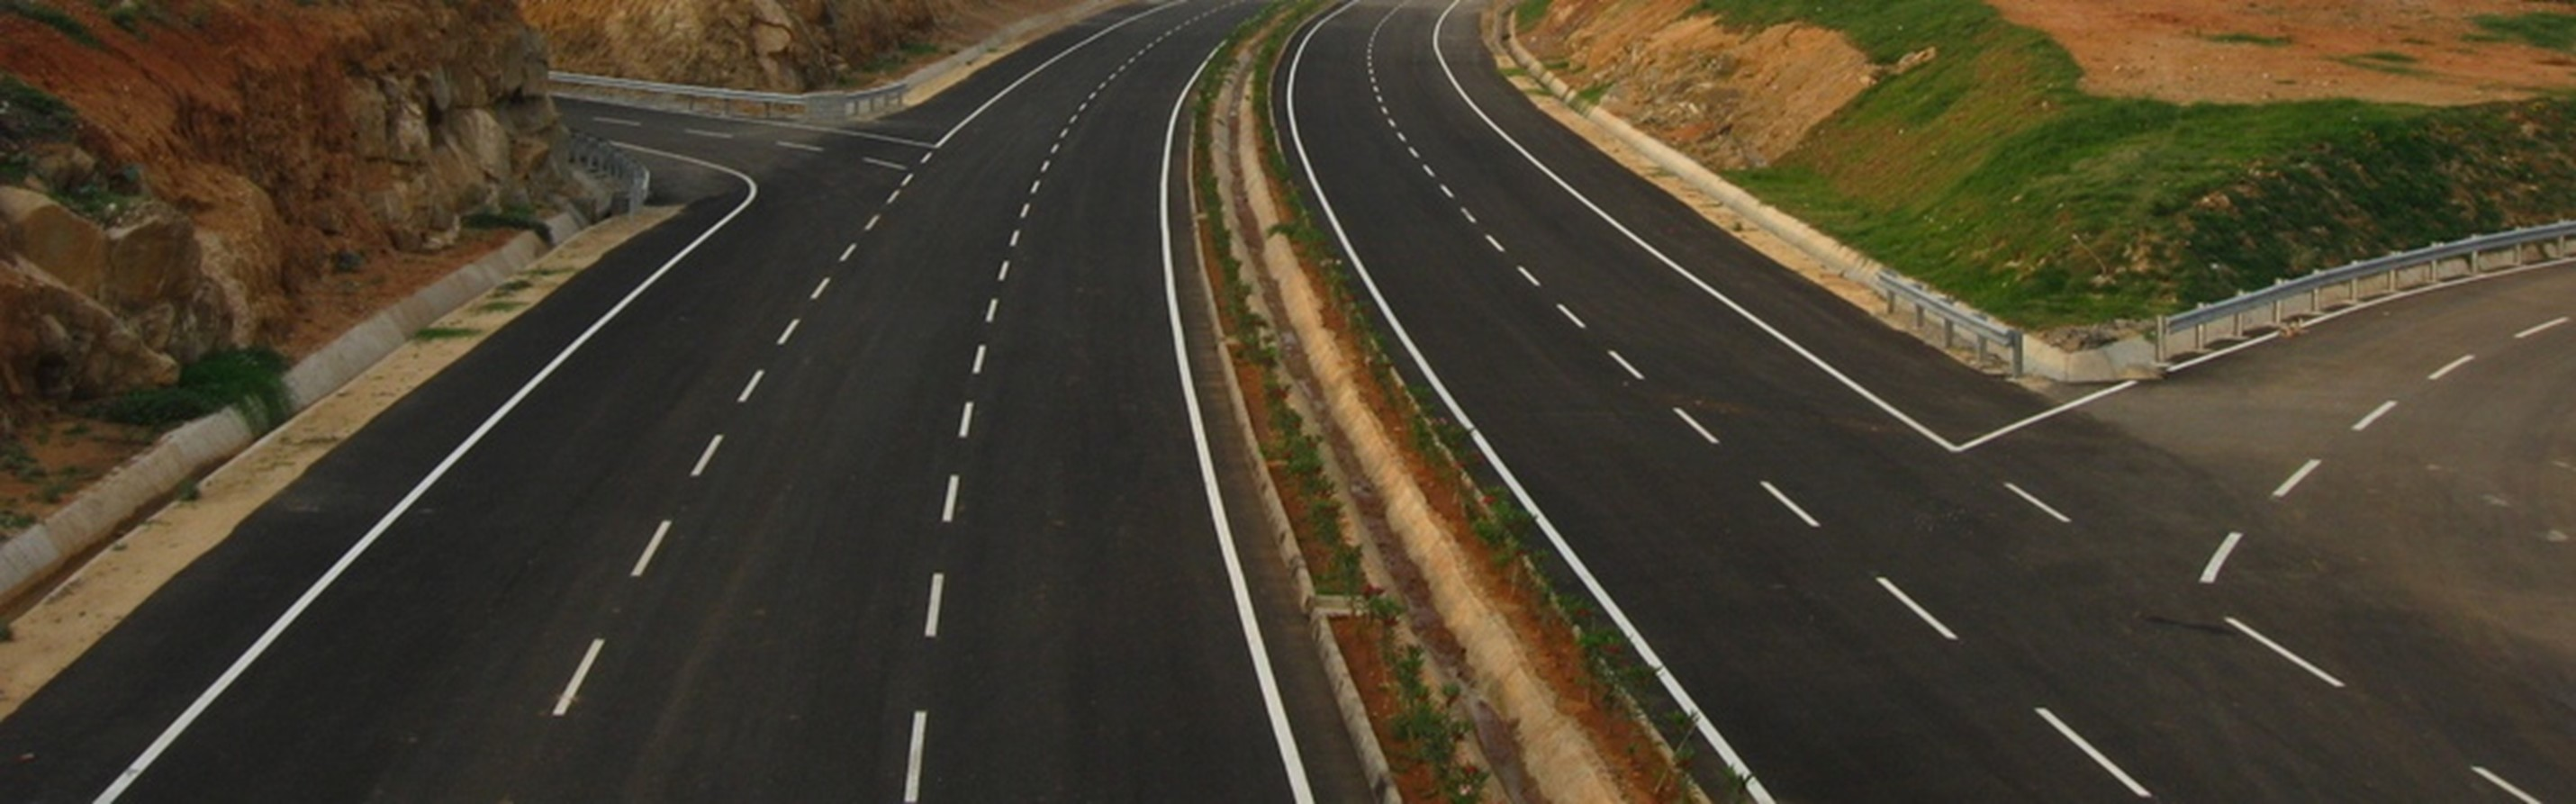

In [13]:
Image.open("Road-Marking-Machine.jpg")

In [14]:
# from PIL
model = YOLO("/content/runs/detect/train/weights/best.pt")
im1 = Image.open("Road-Marking-Machine.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict


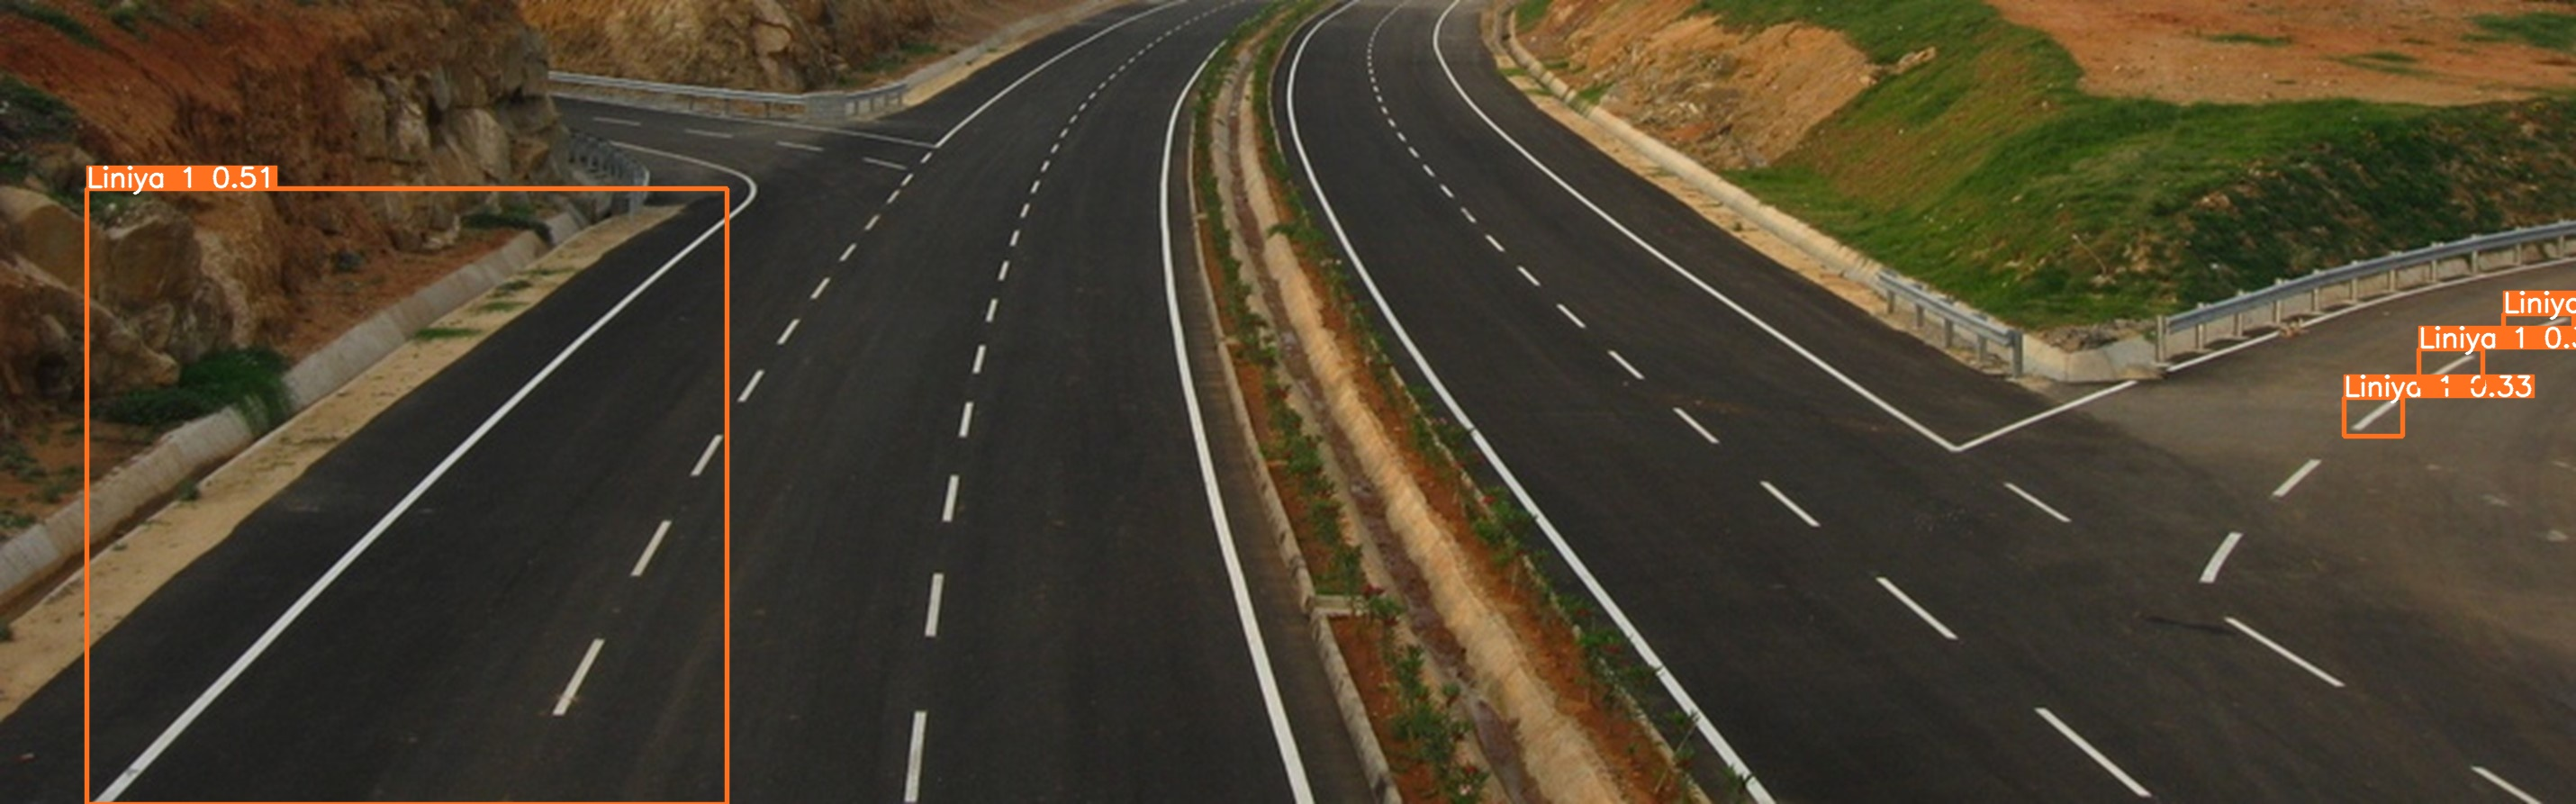

In [15]:
Image.open("/content/runs/detect/predict/image0.jpg")

In [ ]:
Image.open("/content/03-1470225251-lane-indicator-road-markings.jpg")

In [16]:
# from PIL
model = YOLO("/content/runs/detect/train/weights/best.pt")
im1 = Image.open("/content/03-1470225251-lane-indicator-road-markings.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict2


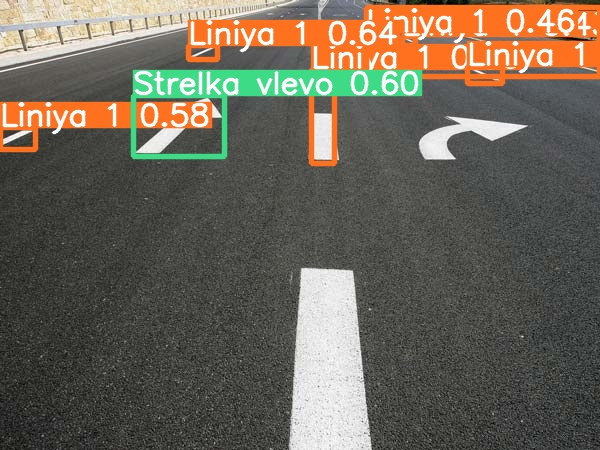

In [17]:
Image.open("/content/runs/detect/predict2/image0.jpg")

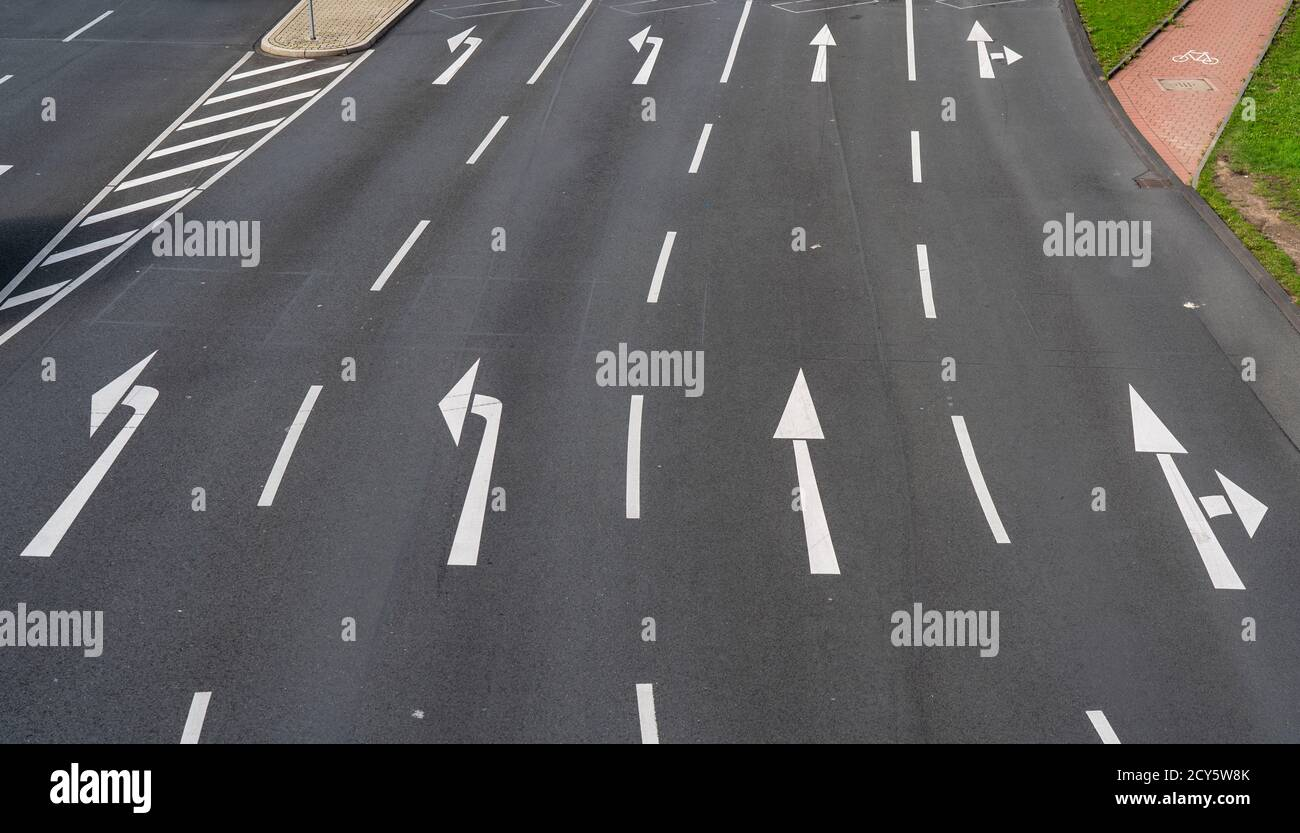

In [22]:
Image.open('/content/road-markings-turning-lanes-directional-signs-at-a-crossing-turning-straight-ahead-nrw-germany-2CY5W8K.jpg')

In [23]:
# from PIL
model = YOLO("/content/runs/detect/train/weights/best.pt")
im1 = Image.open('/content/road-markings-turning-lanes-directional-signs-at-a-crossing-turning-straight-ahead-nrw-germany-2CY5W8K.jpg')
results = model.predict(source=im1, save=True)  # save plotted images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict3


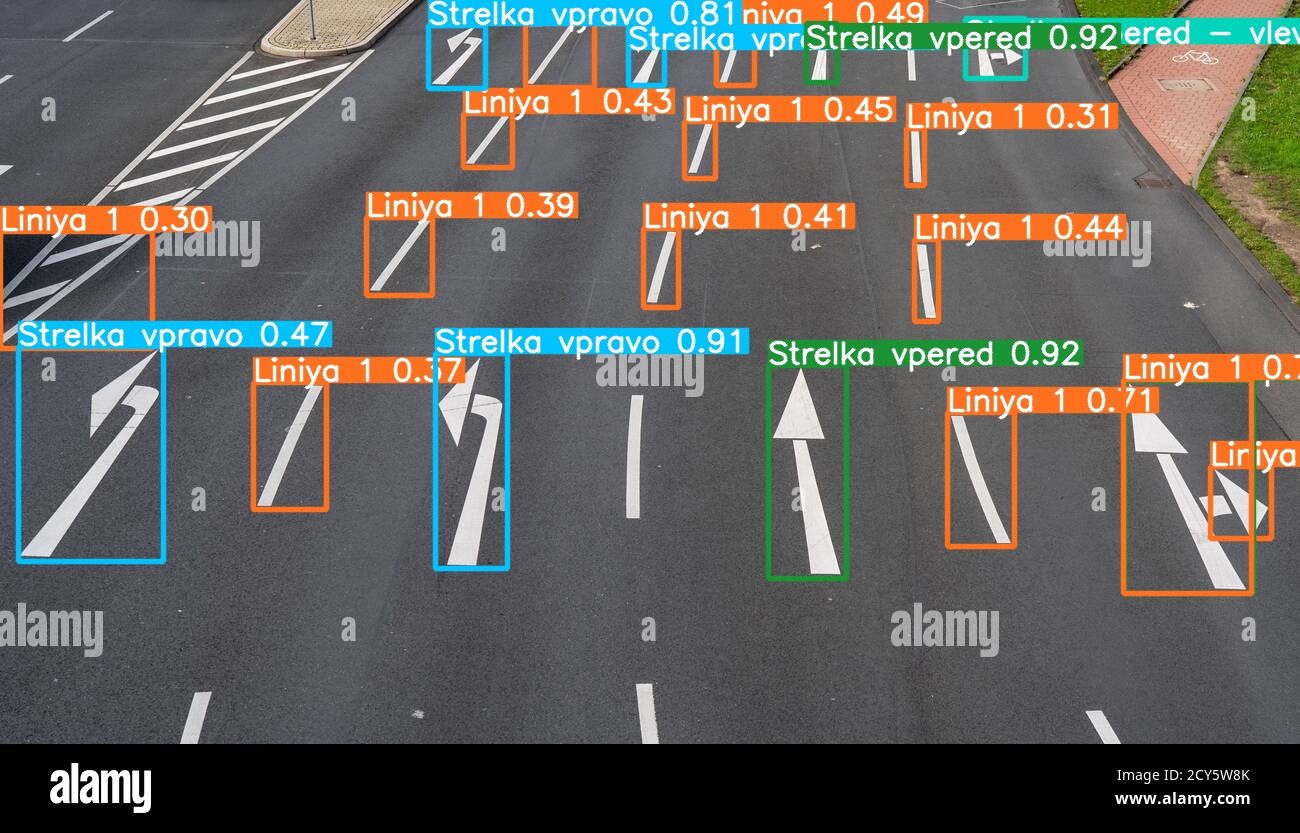

In [24]:
Image.open("/content/runs/detect/predict3/image0.jpg")

### **6. Now Let's Predict with unseen video**

In [18]:
import cv2 as cv

In [28]:
# Load the YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Open the video file
video_path = "/content/What do these road markings mean Let’s find out!.mp4"
results = model.predict(source=video_path, save=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict4


In [29]:
# Open the video file
video_path = "/content/runs/detect/predict4/What do these road markings mean Let’s find out!.mp4"
cap = cv.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Loop through the video frames
while True:
    # Read a frame from the video
    success, frame = cap.read()

    # Check if the end of the video is reached
    if not success:
        print("End of video.")
        break

    # Display the frame
    cv.imshow("Video", frame)

    # Break the loop if 'q' is pressed
    if cv.waitKey(25) & 0xFF == ord("q"):
        break

# Release the video capture object and close the display window
cap.release()
cv.destroyAllWindows()

Error: Could not open video.
End of video.
